# Dataset used: `shampoo.csv`

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import to_datetime

In [31]:
def parser(x):
    return pd.to_datetime("190"+x, format='%Y-%m')

In [33]:
dataset = pd.read_csv("../data/shampoo.csv", parse_dates=["Month"], date_format="%Y-%m")
dataset["Month"] = dataset["Month"].apply(parser)
dataset

,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3
5,1901-06-01,168.5
6,1901-07-01,231.8
7,1901-08-01,224.5
8,1901-09-01,192.8
9,1901-10-01,122.9


## Manual plotting without setting index column

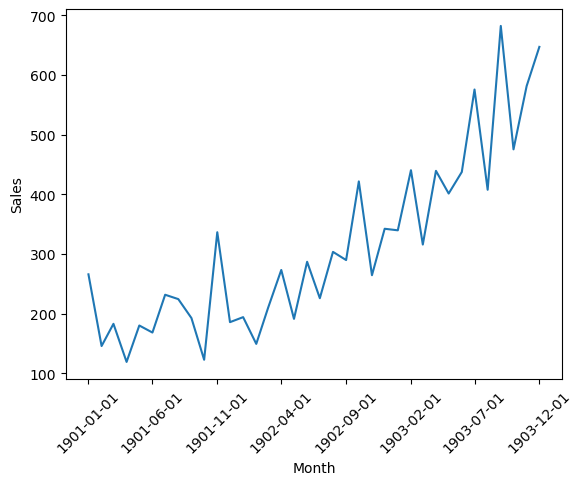

In [34]:
plt.plot(dataset["Month"], dataset["Sales"])
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(dataset["Month"][::5], rotation=45)
plt.show()

## After setting index column as "Month"

In [37]:
dataset.set_index('Month', inplace=True)
dataset

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3
1901-06-01,168.5
1901-07-01,231.8
1901-08-01,224.5
1901-09-01,192.8


<Axes: xlabel='Month'>

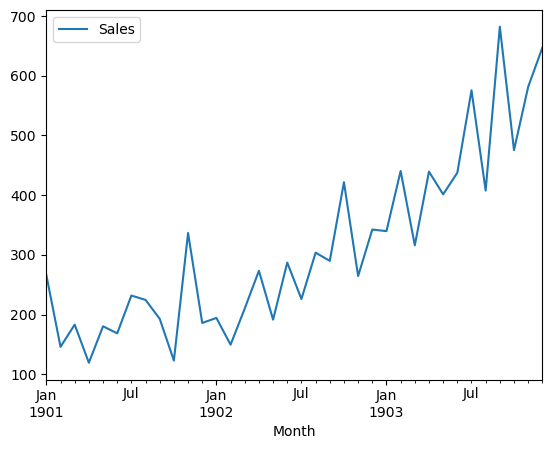

In [38]:
dataset.plot()

# Upsampling

## Upsampling to daily sales information

In [39]:
upsampled = dataset.resample('D').mean()
upsampled

,Sales
Month,
1901-01-01,266.0
1901-01-02,NaN
1901-01-03,NaN
1901-01-04,NaN
1901-01-05,NaN
...,...
1903-11-27,NaN
1903-11-28,NaN
1903-11-29,NaN


# Interpolation

## Linear Interploation

In [40]:
interpolated_linear = upsampled.interpolate(method="linear")
interpolated_linear

,Sales
Month,
1901-01-01,266.000000
1901-01-02,262.125806
1901-01-03,258.251613
1901-01-04,254.377419
1901-01-05,250.503226
...,...
1903-11-27,638.153333
1903-11-28,640.340000
1903-11-29,642.526667


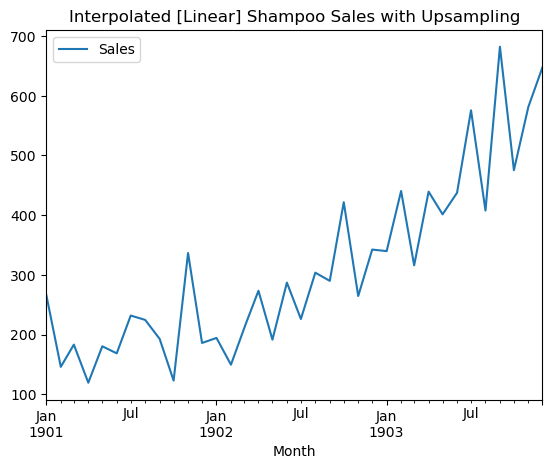

In [53]:
interpolated_linear.plot()
# plt.figure(figsize=(20, 20))
plt.title("Interpolated [Linear] Shampoo Sales with Upsampling")
plt.show()

## Spline Interpolation

In [62]:
interpolated_spline = upsampled.interpolate(method="spline", order=2)
interpolated_spline

,Sales
Month,
1901-01-01,266.000000
1901-01-02,258.630160
1901-01-03,251.560886
1901-01-04,244.720748
1901-01-05,238.109746
...,...
1903-11-27,645.060131
1903-11-28,645.754167
1903-11-29,646.316013


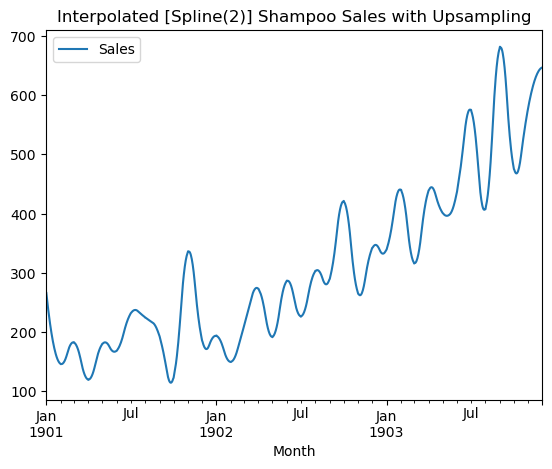

In [63]:
interpolated_spline.plot()
plt.title("Interpolated [Spline(2)] Shampoo Sales with Upsampling")
plt.show()

# Downsampling

## Downsampling to quarterly sales information

In [65]:
downsampled = dataset.resample('QE').mean()
downsampled

,Sales
Month,
1901-03-31,198.333333
1901-06-30,156.033333
1901-09-30,216.366667
1901-12-31,215.100000
1902-03-31,184.633333
1902-06-30,250.566667
1902-09-30,273.166667
1902-12-31,342.800000
1903-03-31,365.333333


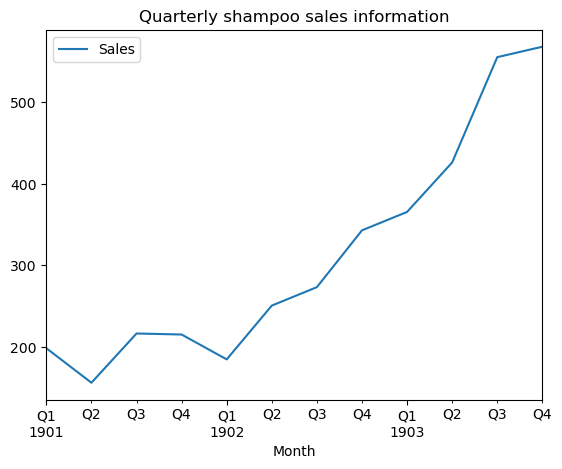

In [68]:
downsampled.plot()
plt.title("Quarterly shampoo sales information")
plt.show()

## Downsampling to yearly sales information

In [70]:
downsampled_2 = dataset.resample('YE').mean()
downsampled_2

,Sales
Month,
1901-12-31,196.458333
1902-12-31,262.791667
1903-12-31,478.550000


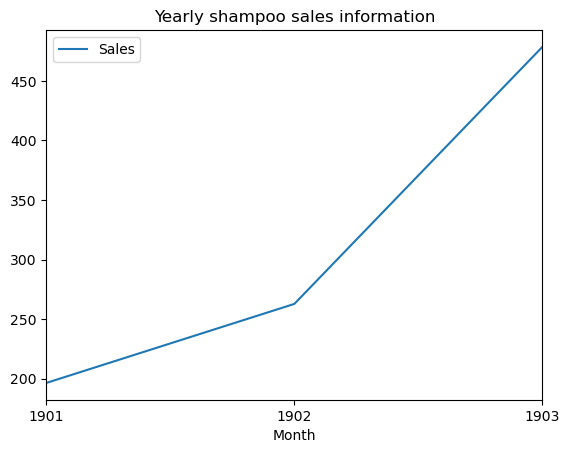

In [71]:
downsampled_2.plot()
plt.title("Yearly shampoo sales information")
plt.show()